<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Butterfly_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [ ]:
%cd '/content/drive/MyDrive/Kaggle'

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Replace 'file_path.zip' with the path to your ZIP file in Google Colab
file_path = '/content/drive/MyDrive/Kaggle/butterfly-image-classification.zip'

# Replace 'extracted_folder' with the folder name where you want to extract the contents
extracted_folder = '/content/drive/MyDrive/Kaggle/butterfly-image-classification'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Unzip completed.")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

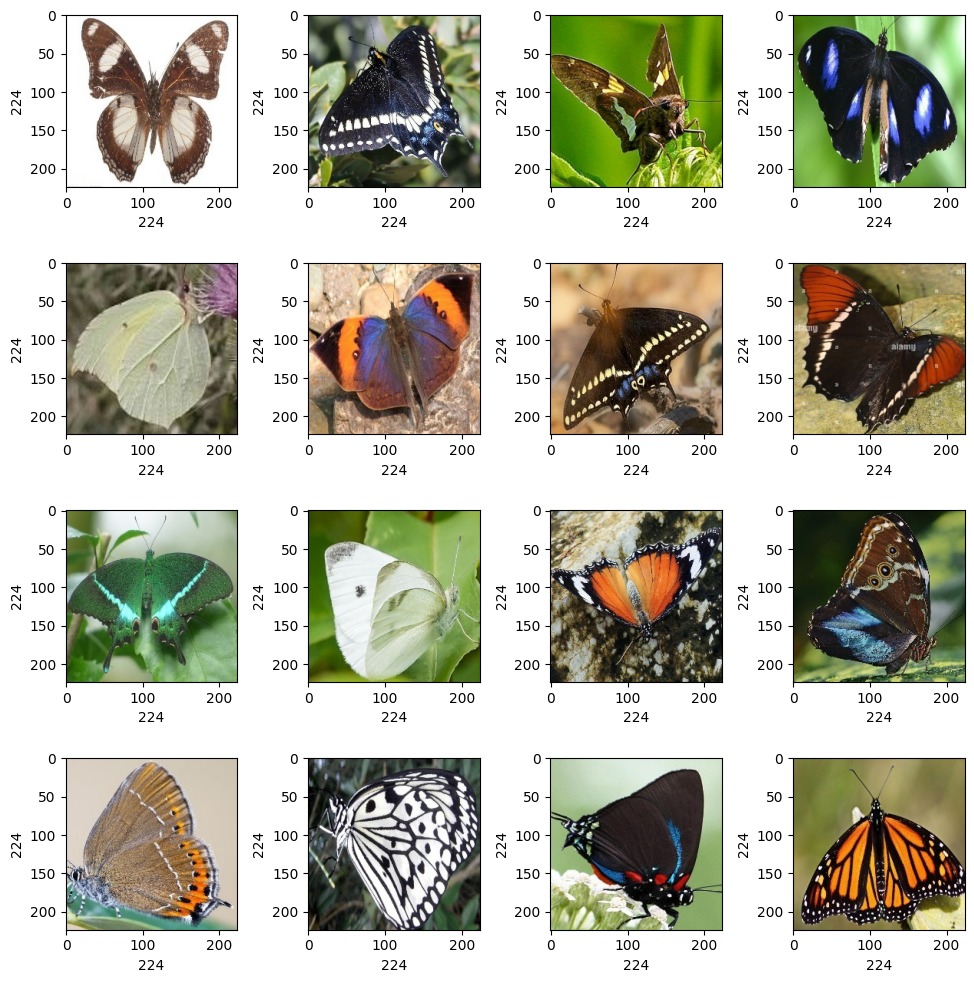

In [ ]:
plt.figure(figsize=(10,10))
path = "/content/drive/MyDrive/Kaggle/butterfly-image-classification/train"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/butterfly-image-classification/Training_set.csv')

In [ ]:
df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [ ]:
image_directory = '/content/drive/MyDrive/Kaggle/butterfly-image-classification/train'
image_paths = [image_directory +'/'+ filename for filename in df['filename']]

In [ ]:
df['filename'] = image_paths

In [ ]:
df.head()

,filename,label
0,/content/drive/MyDrive/Kaggle/butterfly-image-...,SOUTHERN DOGFACE
1,/content/drive/MyDrive/Kaggle/butterfly-image-...,ADONIS
2,/content/drive/MyDrive/Kaggle/butterfly-image-...,BROWN SIPROETA
3,/content/drive/MyDrive/Kaggle/butterfly-image-...,MONARCH
4,/content/drive/MyDrive/Kaggle/butterfly-image-...,GREEN CELLED CATTLEHEART


In [ ]:
label = []
for i in df['label']:
  label.append(i)
filename = []
for i in df['filename']:
  filename.append(i)

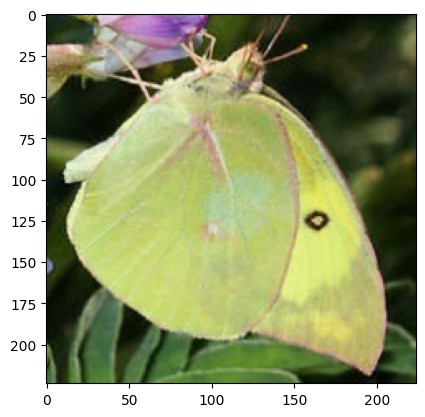

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread(df['filename'][0])
plt.imshow(img)

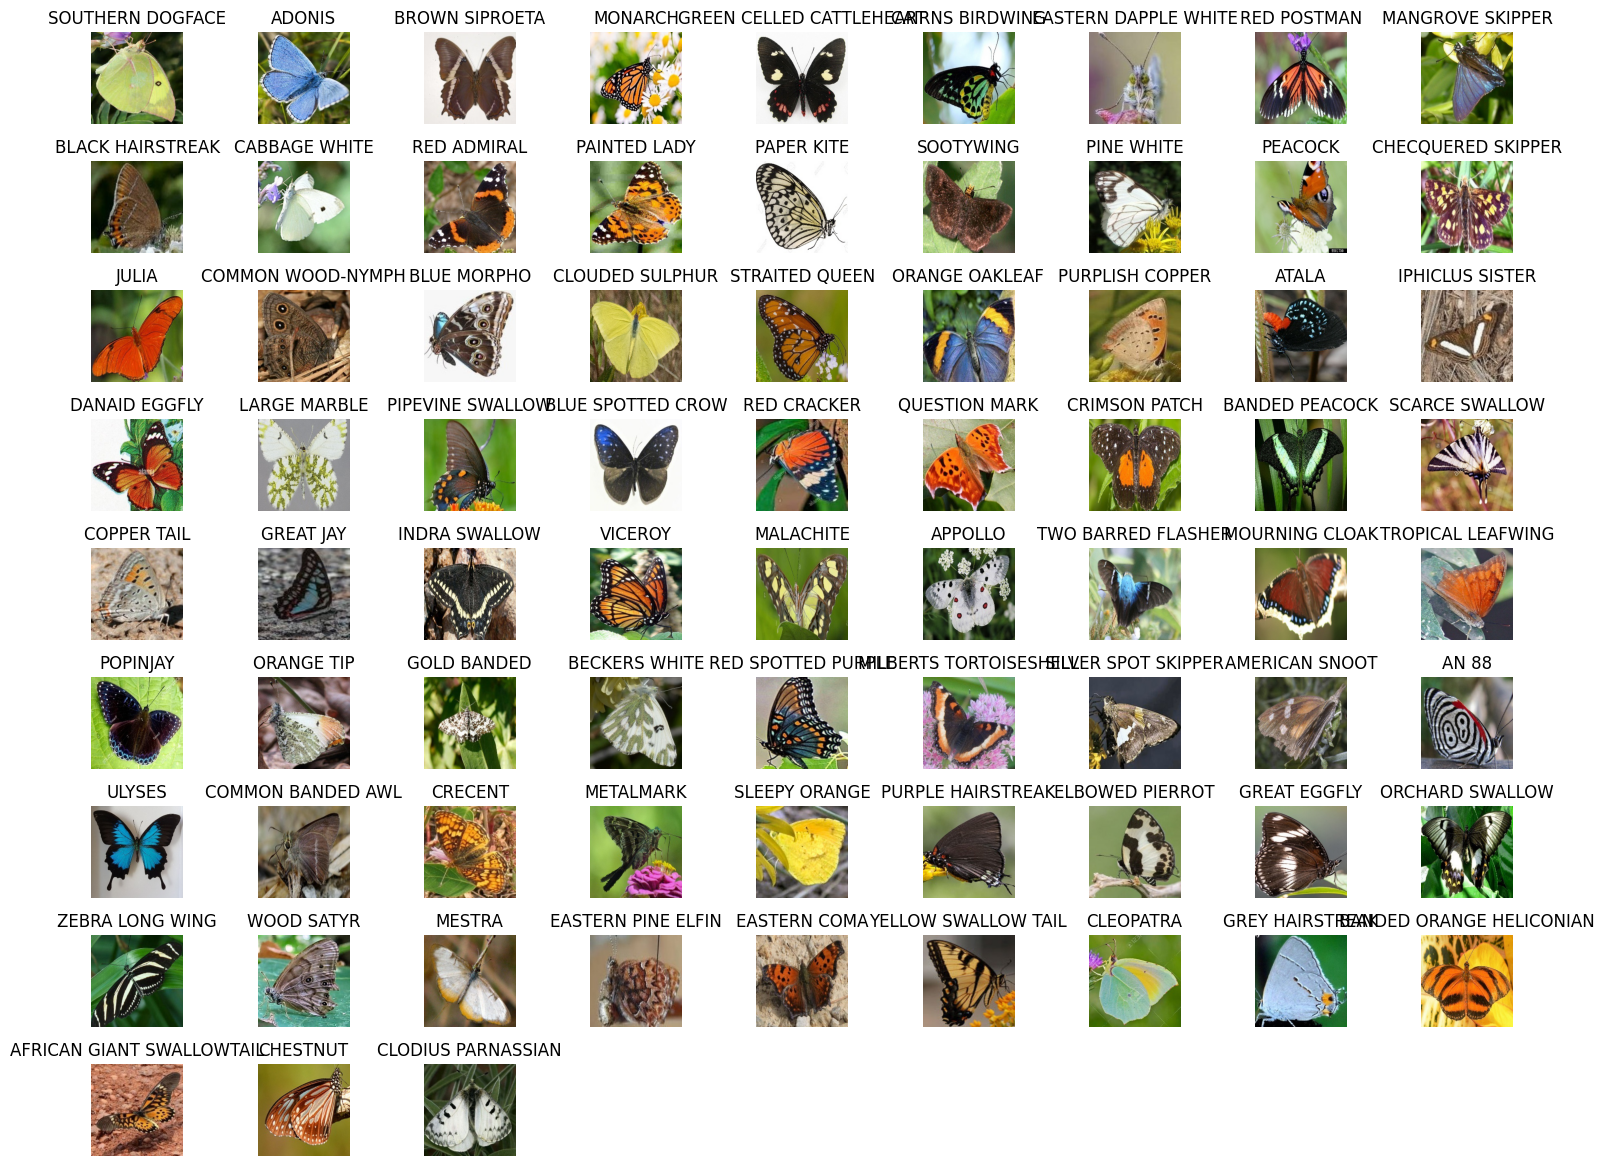

In [ ]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(9, 9, idx+1)
    plt.tight_layout()
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Split the DataFrame into training and testing sets
# Adjust test_size as needed for your dataset
train_df, test_df  = train_test_split(df, test_size=0.4, random_state=42)

# Create data generators for training and testing data
image_width, image_height = 200, 200  # Adjust these dimensions based on your requirements
batch_size = 32  # Adjust batch size as needed
class_mode = 'categorical'  # Use 'categorical' for multi-class classification
train_data_generator = ImageDataGenerator(rescale=1.0 / 255)
test_data_generator = ImageDataGenerator(rescale=1.0 / 255)

# Train data generator
train_data = train_data_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(image_width, image_height),
    color_mode='rgb',
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Test data generator
test_data = test_data_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='label',
    target_size=(image_width, image_height),
    color_mode='rgb',
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=False
)

# Get the number of classes
num_classes = len(df['label'].unique())


Found 3899 validated image filenames belonging to 75 classes.
Found 2600 validated image filenames belonging to 75 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
pretrained_model.trainable = False

# Add additional layers to the model
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=test_data, epochs=5)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

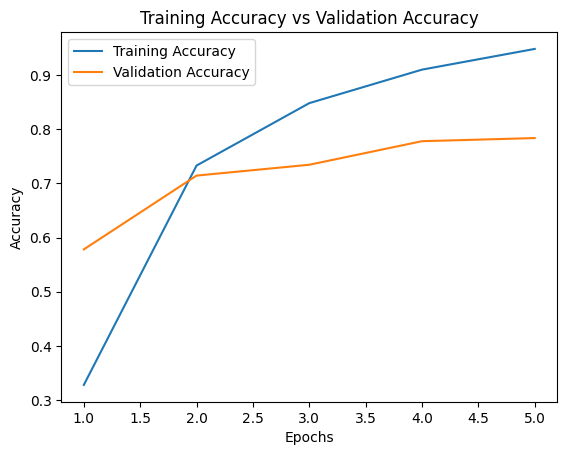

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()